## The Spark Foundation Project

## Prediction Using Supervised ML
we'll build a linear regression model to predict the percentage of marks that a student is expected to score based upon the number of hours they studied using an appropriate predictor variable.

Step 1: Reading and Understanding the Data
Let's start with the following steps:

*Importing data using the pandas library

*Understanding the structure of the data

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn  import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [7]:
#Fetching the Details of the file from URL
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df= pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Lets inspect the various Aspects of our dataframe

In [8]:
df.shape

(25, 2)

In [11]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [75]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Lets Visualise the data 

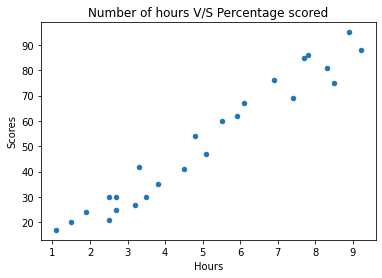

In [42]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores' ,kind='scatter' )    
plt.title('Number of hours V/S Percentage scored')
plt.show()

From the above graph we can infer there is a positive relation between the number of hours and scores of the student

Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

The $m$ values are called the model **coefficients** or **model parameters**

In [44]:
# Create x and y 

X = df['Hours']
y = df['Scores']


## Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [17]:
#Dividing the Data into attributes(input) and labels(output)
x=df.iloc[:,:-1].values
y=df.iloc[:, 1].values

In [19]:
# Dividing the dataset into train and test
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)


In [22]:
#Splitting of Data into training and testing sets is done, and now is finally the time to train our algorithm.
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

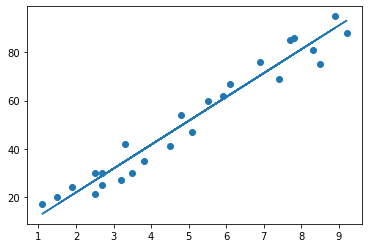

In [24]:
line = regression.coef_*x+regression.intercept_

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x, line);
plt.show()

In [25]:
print(x_test) #Testing data - in hours
y_pred = regression.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [38]:
result = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
result

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [33]:

#Predicting  the percentage of the student who studied for 9.25 hrs/day
hours = np.array(9.25)
hours = hours.reshape(-1, 1)
pred = regression.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score ={}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score =93.69173248737538


In [37]:
#The final step is to evaluate the performance of the algorithm
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


# OUTPUT: We can infer that with a the predicting score of 93.69% the mean absolute error is 4.18 which is almost a good result. 